In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing original dataset

In [2]:
dataset = pd.DataFrame(pd.read_excel("data/345e9990-8715-11eb-85f9-917cda200840Tech Careers Report PT 2021 - Raw Data.xlsx" ,sheet_name="TCS PT 2021 - raw data")).set_index("ID")

dataset.head()

,Employment_Status,Employment_Status_Aggregated,Work_as_Contractor_12m,Work_as_Perm,Residence_Country,Residence_District,Residence_District_Aggregated,Work_Company_Country,Work_Company_Continent,Work_Company_PT_International,...,Citizenship,Birth_Year,Age,Gender,English_Level,Way_Into_Tech,Way_Into_Tech_Other,Education_Level,Working_Experience,Working_Experience_Aggregated
ID,,,,,,,,,,,,,,,,,,,,,
1,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Santarém,Centre,Portugal,Europe,Portugal,...,Portuguese,1984.0,37.0,Male,Full professional proficiency,University,NaN,NaN,More than 9 years,6+ years
2,Employed full-time,Permanent Employee,0.0,NaN,Portugal,Coimbra,Centre,Portugal,Europe,Portugal,...,Portuguese,1976.0,45.0,Male,Full professional proficiency,Self-taught,NaN,NaN,More than 9 years,6+ years
3,Working as a Contractor/Freelancer,Contractor,NaN,1.0,Portugal,Porto,Porto Metropolitan Area,No specific country,NaN,International,...,Portuguese,1986.0,35.0,Male,Full professional proficiency,University,NaN,Bachelor degree,Between 1 - 3 years,0 - 3 years
4,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Açores,Azores and Madeira,Portugal,Europe,Portugal,...,Portuguese,1975.0,46.0,Male,Full professional proficiency,University,NaN,Bachelor degree,More than 9 years,6+ years
5,Employed full-time,Permanent Employee,0.0,NaN,Portugal,Braga,North,Portugal,Europe,Portugal,...,Portuguese,1989.0,32.0,Male,Professional working proficiency,University,NaN,Bachelor degree,Between 6 - 9 years,6+ years


In [3]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3371 entries, 1 to 3371
Data columns (total 125 columns):
 #    Column                                                                       Dtype  
---   ------                                                                       -----  
 0    Employment_Status                                                            object 
 1    Employment_Status_Aggregated                                                 object 
 2    Work_as_Contractor_12m                                                       float64
 3    Work_as_Perm                                                                 float64
 4    Residence_Country                                                            object 
 5    Residence_District                                                           object 
 6    Residence_District_Aggregated                                                object 
 7    Work_Company_Country                                               

## Geting a lighter dataset

In [4]:
# Droping "Job_Motivator" and "Job_Perk" columns
df=dataset
for i in df.columns:
    if "Job_Motivator" in i or "Job_Perk" in i:
        df.drop(axis=1, columns=[i], inplace=True)

In [5]:
# Droping some more columns
df.drop(axis=1, 
        columns=["Employment_Status",
                 "Residence_Country",
                 "Residence_District",
                 "Residence_District_Aggregated",
                 "Work_Company_Continent",
                 "Work_Company_PT_International",
                 "Work_Company_PT_District",
                 "Work_Company_PT_District_Aggregated",
                 "Remote_Working_Current",
                 "Remote_Working_Current_Flexible_Office_Days",
                 "Remote_Working_due_to_Covid",
                 "Remote_Work_Opinion",
                 "Job_Role_Original",
                 "Job_Role_Other",
                 "Employer_Industry",
                 "Employer_Industry_Other",
                 "Employer_Org_Type_Other",
                 "Perm_GAS", "Perm_GAS_Avg",
                 "Perm_GAS_Low_Limit",
                 "Perm_GAS_High_Limit",
                 "Way_Into_Tech",
                 "Way_Into_Tech_Other",
                 "Working_Experience",
                 "Work_as_Contractor_12m",
                 "Work_as_Perm",
                 "Language_Languages_N/A",
                 "Framework_Framework_N/A"
                ],
        inplace=True)

In [6]:
df.head()

,Employment_Status_Aggregated,Work_Company_Country,Job_Remote_or_Office,Job_Role,Employer_Org_Type,Employer_Size,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,...,Salary_Change,Salary_Fairness,Changing_Jobs_next_6_months,Citizenship,Birth_Year,Age,Gender,English_Level,Education_Level,Working_Experience_Aggregated
ID,,,,,,,,,,,,,,,,,,,,,
1,Permanent Employee,Portugal,Full Office Job,Technical Team Leader,Corporate,1000 - 4.999 employees,NaN,NaN,SQL,Java,...,Hasn't changed,4,4.0,Portuguese,1984.0,37.0,Male,Full professional proficiency,NaN,6+ years
2,Permanent Employee,Portugal,Full Office Job,Full-Stack Developer,SME - Small or Medium Enterprise (personnel <250),Less than 10 employees,JavaScript,NaN,SQL,NaN,...,Hasn't changed,4,3.0,Portuguese,1976.0,45.0,Male,Full professional proficiency,NaN,6+ years
3,Contractor,No specific country,Full Office Job,Full-Stack Developer,Startup (new business venture),Less than 10 employees,JavaScript,NaN,SQL,Java,...,Decreased more than 15%,3,5.0,Portuguese,1986.0,35.0,Male,Full professional proficiency,Bachelor degree,0 - 3 years
4,Permanent Employee,Portugal,Full Office Job,Product Owner/Product Manager,SME - Small or Medium Enterprise (personnel <250),100 - 499 employees,JavaScript,NaN,NaN,NaN,...,"]0%, 5%]",4,3.0,Portuguese,1975.0,46.0,Male,Full professional proficiency,Bachelor degree,6+ years
5,Permanent Employee,Portugal,Remote Job (full or flexible),Back-End Developer,SME - Small or Medium Enterprise (personnel <250),10 - 19 employees,JavaScript,NaN,SQL,Java,...,Increased more than 15%,5,2.0,Portuguese,1989.0,32.0,Male,Professional working proficiency,Bachelor degree,6+ years


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3371 entries, 1 to 3371
Data columns (total 72 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Employment_Status_Aggregated      3371 non-null   object 
 1   Work_Company_Country              3369 non-null   object 
 2   Job_Remote_or_Office              3371 non-null   object 
 3   Job_Role                          3371 non-null   object 
 4   Employer_Org_Type                 3330 non-null   object 
 5   Employer_Size                     3371 non-null   object 
 6   Language_JavaScript               1720 non-null   object 
 7   Language_Bash/Shell/PowerShell    612 non-null    object 
 8   Language_SQL                      1555 non-null   object 
 9   Language_Java                     794 non-null    object 
 10  Language_C#                       749 non-null    object 
 11  Language_Python                   617 non-null    object 
 12  Langua

## Encoding columns

### Employer_Org_Type

In [70]:
df["Employer_Org_Type"].unique()

array(['Corporate', 'SME - Small or Medium Enterprise (personnel <250)',
       'Startup (new business venture)', 'Consulting Business', nan,
       'Scale-up (fast growing company aka "unicorn")',
       'Nearshore (outsource business processes to companies in a nearby country)',
       'Outsourcing'], dtype=object)

In [71]:
df["Employer_Org_Type"].isna().sum()

41

In [72]:
df["Employer_Org_Type"]=df["Employer_Org_Type"].apply(lambda x: 'NA' if pd.isna(x) else x)

emp_org_types={'NA':'NA',
               'Corporate':'Corporate',
               'SME - Small or Medium Enterprise (personnel <250)':'SME',
               'Startup (new business venture)':'Startup',
               'Consulting Business':'Consulting',
               'Scale-up (fast growing company aka "unicorn")':'Scale-up',
               'Nearshore (outsource business processes to companies in a nearby country)':'Nearshore',
               'Outsourcing':'Outsourcing'
              }

df["Employer_Org_Type"]=df["Employer_Org_Type"].apply(lambda x: emp_org_types[x])

In [75]:
df["Employer_Org_Type"].unique()

array(['Corporate', 'SME', 'Startup', 'Consulting', 'NA', 'Scale-up',
       'Nearshore', 'Outsourcing'], dtype=object)

### Employment_Status

In [8]:
df["Employment_Status_Aggregated"].unique()

array(['Permanent Employee', 'Contractor'], dtype=object)

In [13]:
df["Employment_Status_Aggregated"]=df["Employment_Status_Aggregated"].apply(lambda x: 0 if x=="Permanent Employee" else 1)

In [15]:
df["Employment_Status_Aggregated"].unique()

array([0, 1])

### Education_Level

In [17]:
df["Education_Level"].unique()

array([nan, 'Bachelor degree', 'High School Education', 'Basic Education',
       'Doctoral degree', 'I prefer not to answer', 'Masters degree',
       'Trade/technical/vocational training', 'University drop out'],
      dtype=object)

In [18]:
df["Education_Level"]=df["Education_Level"].apply(lambda x: 'NA' if pd.isna(x) else x)

Educ_levels={'NA':0,
             'I prefer not to answer':0,
             'Basic Education':1,
             'High School Education':2,
             'Bachelor degree':3,
             'Masters degree':4,
             'Doctoral degree':5,
             'Trade/technical/vocational training':2,
             'University drop out':2
            }

df["Education_Level"]=df["Education_Level"].apply(lambda x: Educ_levels[x])

In [19]:
df["Education_Level"].unique()

array([0, 3, 2, 1, 5, 4])

### Age

In [23]:
df['Age'].unique()

array([37., 45., 35., 46., 32., 26., 30., 38., 24., 39., 25., 29., 27.,
       31., 40., 43., 23., 33., 34., 51., 36., 28., 50., 41., 44., 49.,
       22., 42., 21., 48., 47., 52., 53., 62., 58., 59., 56., 54., 55.,
       nan, 61., 19., 20., 67., 57.])

In [27]:
df.dropna(subset=["Age"], inplace=True)

In [39]:
df.isna().sum()

Employment_Status_Aggregated      0
Work_Company_Country              2
Job_Remote_or_Office              0
Job_Role                          0
Employer_Org_Type                41
                                 ..
Age                               0
Gender                            0
English_Level                     0
Education_Level                   0
Working_Experience_Aggregated     0
Length: 72, dtype: int64

### Job_Remote_or_Office

In [41]:
df["Job_Remote_or_Office"].unique()

array(['Full Office Job', 'Remote Job (full or flexible)'], dtype=object)

In [42]:
df["Job_Remote_or_Office"]=df["Job_Remote_or_Office"].apply(lambda x: 0 if x=='Full Office Job' else 1)

### Working_Experience_Aggregated

In [46]:
df["Working_Experience_Aggregated"].unique()

array(['6+ years', '0 - 3 years', '3 - 6 years', '0 Years'], dtype=object)

In [47]:
work_exp={'0 Years':0,
          '0 - 3 years':1,
          '3 - 6 years':2,
          '6+ years':3
         }
df["Working_Experience_Aggregated"]=df["Working_Experience_Aggregated"].apply(lambda x: work_exp[x])
df["Working_Experience_Aggregated"].unique()

array([3, 1, 2, 0])

### Salary_Fairness

In [79]:
df.Salary_Fairness.unique()

array([4, 3, 5, 2, 1, 7, 6])

### Changing_Jobs_next_6_months

In [80]:
df.Changing_Jobs_next_6_months.unique()

array([ 4.,  3.,  5.,  2.,  1., nan])

In [82]:
df["Changing_Jobs_next_6_months"]=df["Changing_Jobs_next_6_months"].apply(lambda x: 0 if pd.isna(x) else int(x))

In [83]:
df.Changing_Jobs_next_6_months.unique()

array([4, 3, 5, 2, 1, 0])

## Correlation Matrix

In [84]:
columns=["Avg_Salary", "Age", "Gender", "Salary_Fairness", "Education_Level", "Job_Remote_or_Office", "Working_Experience_Aggregated","Changing_Jobs_next_6_months"]
corr=df[columns].corr()
corr.style.background_gradient(cmap='Blues')

,Avg_Salary,Age,Salary_Fairness,Education_Level,Job_Remote_or_Office,Working_Experience_Aggregated,Changing_Jobs_next_6_months
Avg_Salary,1.000000,0.391660,0.366518,0.129566,0.223997,0.477340,-0.188359
Age,0.391660,1.000000,0.045024,0.044314,0.055990,0.649331,-0.003783
Salary_Fairness,0.366518,0.045024,1.000000,0.013990,0.192817,0.100560,-0.461594
Education_Level,0.129566,0.044314,0.013990,1.000000,-0.020968,0.050644,-0.010613
Job_Remote_or_Office,0.223997,0.055990,0.192817,-0.020968,1.000000,0.111230,-0.111209
Working_Experience_Aggregated,0.477340,0.649331,0.100560,0.050644,0.111230,1.000000,-0.051888
Changing_Jobs_next_6_months,-0.188359,-0.003783,-0.461594,-0.010613,-0.111209,-0.051888,1.000000


# Analysis for companies

## Avg_Salary VS Age

In [90]:
fig=px.scatter(df,
                 x="Avg_Salary", 
                 y="Age"
                )

fig.show()

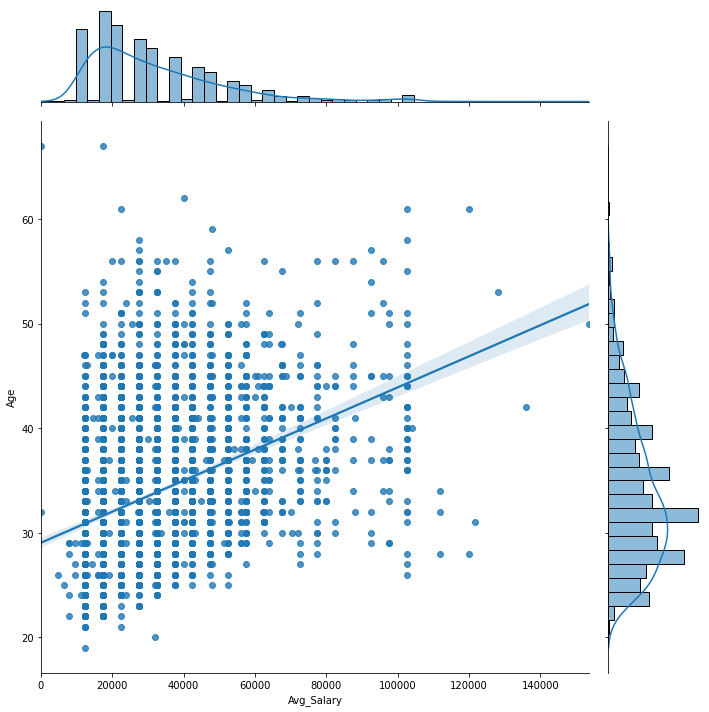

In [87]:
sns.jointplot(data=df, x="Avg_Salary", y="Age", kind='reg', height=10)

## A dataset for the analysis

In [49]:
comp_df=pd.DataFrame(dataset, columns=["Employer_Size","Employer_Org_Type", "Avg_Salary", "Changing_Jobs_next_6_months", "Work_Company_Country"])
comp_df

,Employer_Size,Employer_Org_Type,Avg_Salary,Changing_Jobs_next_6_months,Work_Company_Country
ID,,,,,
1,1000 - 4.999 employees,Corporate,32500,4.0,Portugal
2,Less than 10 employees,SME - Small or Medium Enterprise (personnel <250),12500,3.0,Portugal
3,Less than 10 employees,Startup (new business venture),16000,5.0,No specific country
4,100 - 499 employees,SME - Small or Medium Enterprise (personnel <250),17500,3.0,Portugal
5,10 - 19 employees,SME - Small or Medium Enterprise (personnel <250),17500,2.0,Portugal
...,...,...,...,...,...
3367,20 - 99 employees,Corporate,17500,3.0,Portugal
3368,100 - 499 employees,SME - Small or Medium Enterprise (personnel <250),27500,2.0,Portugal
3369,1000 - 4.999 employees,Corporate,32500,3.0,Germany


In [50]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3365 entries, 1 to 3371
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Employer_Size                3365 non-null   object 
 1   Employer_Org_Type            3324 non-null   object 
 2   Avg_Salary                   3365 non-null   int64  
 3   Changing_Jobs_next_6_months  3363 non-null   float64
 4   Work_Company_Country         3363 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 157.7+ KB


In [51]:
comp_df["Employer_Org_Type"].isna().sum()

41

In [52]:
comp_df["Employer_Org_Type"]=comp_df["Employer_Org_Type"].apply(lambda x: "NA" if pd.isna(x) else x)

In [53]:
comp_df["Employer_Org_Type"].unique()

array(['Corporate', 'SME - Small or Medium Enterprise (personnel <250)',
       'Startup (new business venture)', 'Consulting Business', 'NA',
       'Scale-up (fast growing company aka "unicorn")',
       'Nearshore (outsource business processes to companies in a nearby country)',
       'Outsourcing'], dtype=object)

In [54]:
comp_df["Changing_Jobs_next_6_months"].isna().sum()

2

In [55]:
comp_df["Changing_Jobs_next_6_months"]=comp_df["Changing_Jobs_next_6_months"].apply(lambda x: 0 if pd.isna(x) else x)

In [56]:
comp_df["Avg_Salary"].isna().sum()

0

In [57]:
comp_df["Employer_Size"].isna().sum()

0

In [58]:
np.sort(comp_df["Employer_Size"].unique())

array(['10 - 19 employees', '100 - 499 employees',
       '1000 - 4.999 employees', '20 - 99 employees',
       '500 - 999 employees', 'Less than 10 employees',
       'More than 5.000 employees'], dtype=object)

## Avg Salary vs Employer Size vs Employer Org. Type vs Willing to change jobs

In [91]:
fig_0=px.scatter(df,
                 x="Avg_Salary", 
                 y="Changing_Jobs_next_6_months"
                )
#fig.update_layout(dict(showlegend=False))
fig_0.show()

In [94]:
fig_1=px.scatter(df,
                 x="Avg_Salary", 
                 y="Employer_Org_Type",
                 #facet_row="Employer_Size",
                 color="Changing_Jobs_next_6_months", 
                 category_orders={"Employer_Size":["Less than 10 employees",
                                                   "10 - 19 employees",
                                                   "20 - 99 employees",
                                                   "100 - 499 employees",
                                                   "500 - 999 employees",
                                                   "1000 - 4.999 employees",
                                                   "More than 5.000 employees"
                                                  ],
                                  "Changing_Jobs_next_6_months":["0","1","2","3","4","5"]
                                 },
                #height=2000
                )
#fig.update_layout(dict(showlegend=False))
fig_1.show()

## Avg Salary vs Employer Org Type vs Willing to change jobs

In [93]:
fig_2=px.scatter(df,
                 x="Avg_Salary",
                 y="Employer_Org_Type",
                 color="Changing_Jobs_next_6_months")

fig_2.show()

## Employer_Org_Type vs Willing to change Jobs

<AxesSubplot:xlabel='Employer_Org_Type', ylabel='Changing_Jobs_next_6_months'>

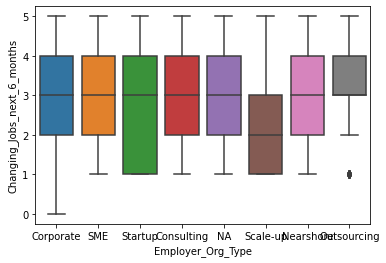

In [98]:
sns.boxplot(data=df, x="Employer_Org_Type", y="Changing_Jobs_next_6_months")

legend:
- 1:'Not Changing'
- 7:'Definitly Changing'

## Salary vs Willing to change

<AxesSubplot:xlabel='Changing_Jobs_next_6_months', ylabel='Avg_Salary'>

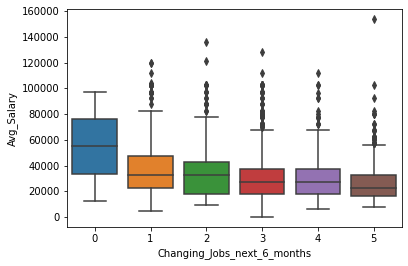

In [100]:
sns.boxplot(data=df, x="Changing_Jobs_next_6_months", y="Avg_Salary")

# Analysis for employees

In [63]:
dataset["Working_Experience_Aggregated"].unique()

array([3, 1, 2, 0])

## Working Experience vs Avg Salary by Remote/Office Job by Gender

In [64]:
fig_3=px.scatter(dataset,
                 x="Avg_Salary",
                 y="Working_Experience_Aggregated",
                 facet_row="Gender",
                 facet_col="Job_Remote_or_Office",
                 height=1000,
                 category_orders={"Working_Experience_Aggregated":["6+ years", "3 - 6 years", "0 - 3 years", "0 Years"]}
                )

fig_3.show()

In [126]:
fig_3=px.scatter(dataset,
                 x="Avg_Salary",
                 y="Age",
                 facet_row="Working_Experience_Aggregated",
                 facet_col="Job_Remote_or_Office",
                 height=1500,
                 category_orders={"Working_Experience_Aggregated":["6+ years", "3 - 6 years", "0 - 3 years", "0 Years"]}
                )

fig_3.show()

## Salary by Job_role

In [101]:
df.Job_Role.unique()

array(['Technical Team Leader', 'Full-Stack Developer',
       'Product Owner/Product Manager', 'Back-End Developer',
       'Mobile Apps Developer', 'Front-End Developer', 'Project Manager',
       'Business Applications (BI/CRM/ERP)',
       'Data Scientist/Data Engineer', 'DevOps Engineer',
       'Computer & Network Security', 'Quality Assurance/Testing',
       'Maintenance & Support', 'CTO', 'UX/UI Designer', 'Scrum Master',
       'Solutions Architect', 'SysAdmin Engineer'], dtype=object)

Text(0.5, 1.0, 'Salary by job role')

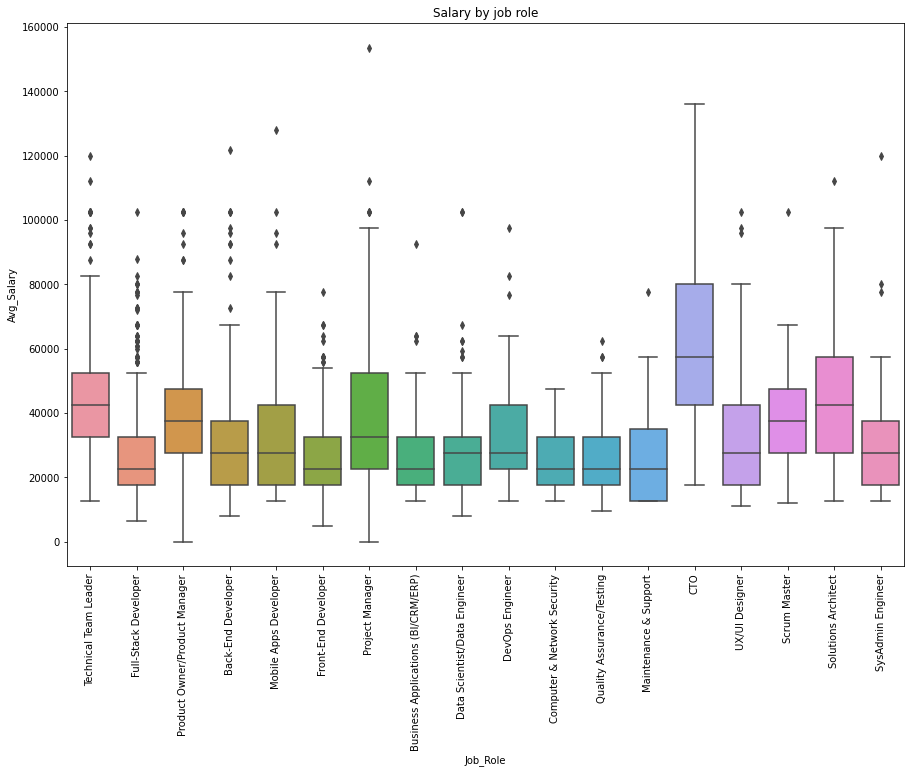

In [108]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(data=df, x="Job_Role", y="Avg_Salary").set_title("Salary by job role")

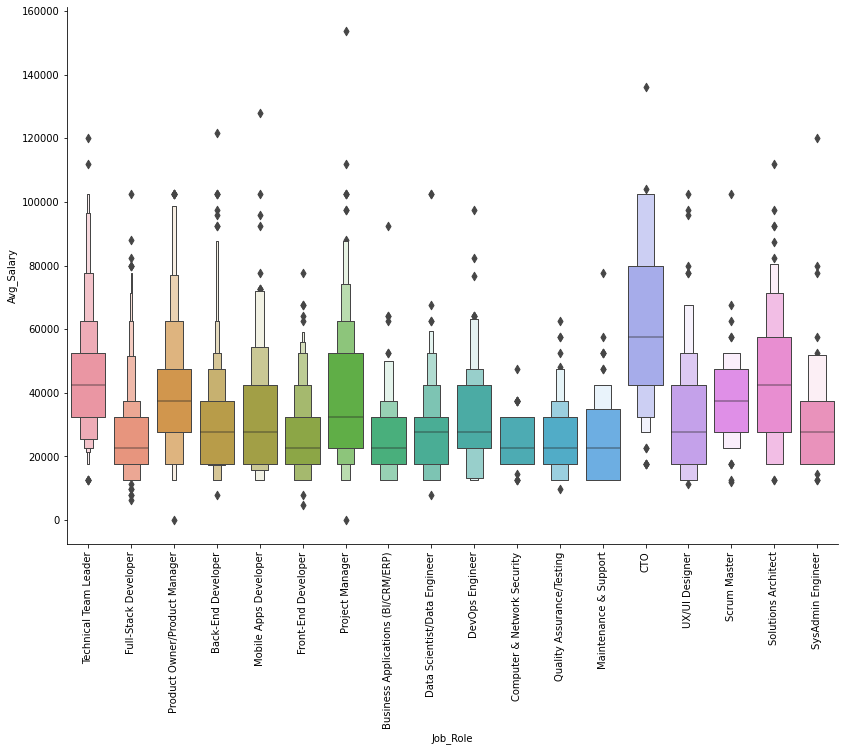

In [122]:
g=sns.catplot(data=df, x="Job_Role", y="Avg_Salary", height=8, kind="boxen", aspect=1.5)
g.set_xticklabels(rotation=90)

## Languages vs Role vs Salary vs Remote/Office

In [127]:
df.columns

Index(['Employment_Status_Aggregated', 'Work_Company_Country',
       'Job_Remote_or_Office', 'Job_Role', 'Employer_Org_Type',
       'Employer_Size', 'Language_JavaScript',
       'Language_Bash/Shell/PowerShell', 'Language_SQL', 'Language_Java',
       'Language_C#', 'Language_Python', 'Language_PHP', 'Language_C++',
       'Language_C', 'Language_TypeScript', 'Language_Ruby', 'Language_Swift',
       'Language_Objective-C', 'Language_VB.NET', 'Language_Assembly',
       'Language_R', 'Language_Perl', 'Language_VBA', 'Language_Matlab',
       'Language_Go', 'Language_Scala', 'Language_Groovy',
       'Language_Coffee Script', 'Language_Visual Basic 6', 'Language_Lua',
       'Language_Haskell', 'Language_HTML/CSS', 'Language_Kotlin',
       'Language_Rust', 'Language_Elixir', 'Language_Clojure',
       'Language_WebAssembly', 'Language_Dart', 'Language_Languages_Other',
       'Framework_jQuery', 'Framework_.NET', 'Framework_Angular/Angular.js',
       'Framework_Ruby on Rails', 'Fra

In [135]:
cols=[]
for col in df.columns:
    if 'Language' in col:
        cols.append(col)

In [136]:
cols

['Language_JavaScript',
 'Language_Bash/Shell/PowerShell',
 'Language_SQL',
 'Language_Java',
 'Language_C#',
 'Language_Python',
 'Language_PHP',
 'Language_C++',
 'Language_C',
 'Language_TypeScript',
 'Language_Ruby',
 'Language_Swift',
 'Language_Objective-C',
 'Language_VB.NET',
 'Language_Assembly',
 'Language_R',
 'Language_Perl',
 'Language_VBA',
 'Language_Matlab',
 'Language_Go',
 'Language_Scala',
 'Language_Groovy',
 'Language_Coffee Script',
 'Language_Visual Basic 6',
 'Language_Lua',
 'Language_Haskell',
 'Language_HTML/CSS',
 'Language_Kotlin',
 'Language_Rust',
 'Language_Elixir',
 'Language_Clojure',
 'Language_WebAssembly',
 'Language_Dart',
 'Language_Languages_Other']

In [133]:
dflang=pd.DataFrame(df["Job_Role"])

In [134]:
dflang["Langs"]=df[cols]

,Job_Role
ID,
1,Technical Team Leader
2,Full-Stack Developer
3,Full-Stack Developer
4,Product Owner/Product Manager
5,Back-End Developer
